# Task 9: Business Insights & Executive Report for E-Commerce Dataset

## 📥 Step 1: Load and Merge Core Tables

We begin by importing the full set of CSV files from the Olist e-commerce dataset.  
These tables contain customer, order, product, payment, review, and location data — all essential for building a unified view of the business.

### 🎯 Objective

- Load each CSV file into a separate DataFrame
- Inspect key columns and relationships
- Prepare for merging into a consolidated dataset

### 📄 Files Used

1. `olist_customers_dataset.csv`  
2. `olist_geolocation_dataset.csv`  
3. `olist_order_items_dataset.csv`  
4. `olist_order_payments_dataset.csv`  
5. `olist_order_reviews_dataset.csv`  
6. `olist_orders_dataset.csv`  
7. `olist_products_dataset.csv`  
8. `olist_sellers_dataset.csv`  
9. `product_category_name_translation.csv`

In [9]:
import pandas as pd

# Load CSV files
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
categories = pd.read_csv("product_category_name_translation.csv")

# Preview structure
print("Customers:", customers.shape)
print("Geolocation:", geolocation.shape)
print("Order Items:", order_items.shape)
print("Payments:", payments.shape)
print("Reviews:", reviews.shape)
print("Orders:", orders.shape)
print("Products:", products.shape)
print("Sellers:", sellers.shape)
print("Categories:", categories.shape)


Customers: (99441, 5)
Geolocation: (1000163, 5)
Order Items: (112650, 7)
Payments: (103886, 5)
Reviews: (99224, 7)
Orders: (99441, 8)
Products: (32951, 9)
Sellers: (3095, 4)
Categories: (71, 2)


### 📊 Dataset Overview

After loading all 9 CSV files, we observe the following dimensions:

| Table                         | Rows     | Columns | Description                          |
|------------------------------|----------|---------|--------------------------------------|
| olist_orders_dataset         | 99,441   | 8       | Core order metadata                  |
| olist_customers_dataset      | 99,441   | 5       | Customer location and ID mapping     |
| olist_order_items_dataset    | 112,650  | 7       | Products per order                   |
| olist_order_payments_dataset | 103,886  | 5       | Payment method and amount            |
| olist_order_reviews_dataset  | 99,224   | 7       | Review scores and comments           |
| olist_products_dataset       | 32,951   | 9       | Product category and attributes      |
| olist_sellers_dataset        | 3,095    | 4       | Seller ID and location               |
| olist_geolocation_dataset    | 1,000,163| 5       | Zip code-level coordinates           |
| product_category_name_translation | 71   | 2       | Portuguese-to-English category map   |

This overview confirms the dataset is **rich and multi-relational**, with over 100K orders and detailed metadata across customers, products, payments, and reviews.  
Next, we’ll clean and preprocess these tables to prepare for analysis.


## 🧹 Step 2: Data Cleaning & Preprocessing

Before merging and analyzing the Olist dataset, we clean and standardize each table to ensure consistency and reliability.

### 🎯 Objective

- Handle missing values and duplicates
- Convert date columns to datetime format
- Normalize categorical fields
- Align key relationships across tables

### 🔍 Key Cleaning Actions

1. **Check for nulls and duplicates**
2. **Convert date columns** in `orders`, `reviews`, and `payments`
3. **Standardize category names** using the translation table
4. **Verify primary keys** for merging (e.g. `order_id`, `customer_id`, `product_id`)

In [10]:
# Check for missing values
for name, df_ in [("orders", orders), ("customers", customers), ("order_items", order_items),
                  ("payments", payments), ("reviews", reviews), ("products", products),
                  ("sellers", sellers), ("categories", categories)]:
    print(f"{name}:")
    print(df_.isnull().sum())
    print("-" * 40)

# Convert date columns
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"])
orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

reviews["review_creation_date"] = pd.to_datetime(reviews["review_creation_date"])
reviews["review_answer_timestamp"] = pd.to_datetime(reviews["review_answer_timestamp"])

# Merge product category translation
products = products.merge(categories, how="left", on="product_category_name")

# Rename for clarity
products.rename(columns={"product_category_name_english": "category_name"}, inplace=True)

# Drop duplicates if any
for name, df_ in [("orders", orders), ("customers", customers), ("order_items", order_items),
                  ("payments", payments), ("reviews", reviews), ("products", products),
                  ("sellers", sellers)]:
    df_.drop_duplicates(inplace=True)


orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------------------------
customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
----------------------------------------
order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------
payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
------------------------

### 🧼 Null Value Summary & Observations

After inspecting missing values across all tables, we note the following:

#### ✅ Clean Tables
- `customers`, `order_items`, `payments`, `sellers`, and `categories` have **no missing values**, making them ready for merging.

#### ⚠️ Partial Nulls
- `orders`:  
  - `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date` contain **160–2965 nulls**, likely due to canceled or incomplete orders.
- `reviews`:  
  - `review_comment_title` and `review_comment_message` are missing in **most rows**, which is expected for short reviews or numeric-only feedback.
- `products`:  
  - ~600 rows missing category and description fields — these may be incomplete listings or inactive SKUs.
  - 2 rows missing physical dimensions — can be dropped or imputed if needed.

### 🧠 Implications

- Nulls in `orders` should be preserved for status-based filtering (e.g. delivered vs. canceled).
- Missing review text is not critical for numeric scoring analysis but should be noted for NLP tasks.
- Incomplete product metadata may be excluded from category-level insights or flagged during segmentation.

These observations guide how we handle joins and which rows to filter or retain in downstream analysis.


## 📊 Step 3: Exploratory Data Analysis (EDA)

With the data cleaned, we now explore key business metrics to uncover patterns in customer behavior, order volume, and revenue.

### 🎯 Objective

- Visualize order volume over time
- Analyze revenue trends
- Explore customer distribution by state
- Examine review scores and delivery delays

### 🔍 Key Metrics

1. **Order Volume Over Time**  
   Track how many orders were placed each month.

2. **Monthly Revenue**  
   Sum total payments per month to observe financial performance.

3. **Customer Distribution**  
   Count customers by state to identify geographic concentration.

4. **Review Score Distribution**  
   Understand customer satisfaction levels.

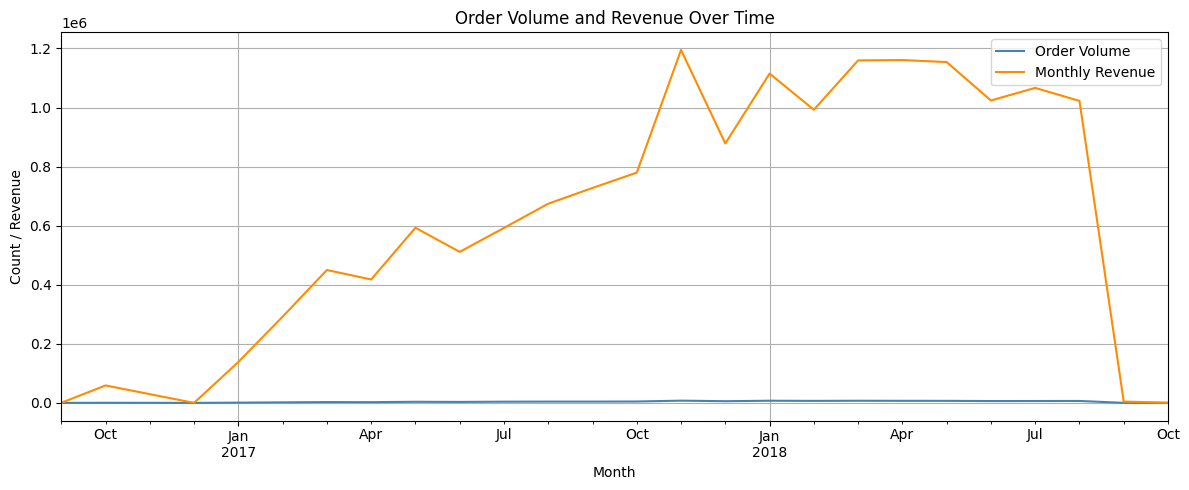

In [11]:
# Order volume per month
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period("M")
order_volume = orders.groupby("order_month")["order_id"].count()

# Monthly revenue
payments = payments.merge(orders[["order_id", "order_purchase_timestamp"]], on="order_id")
payments["order_month"] = payments["order_purchase_timestamp"].dt.to_period("M")
monthly_revenue = payments.groupby("order_month")["payment_value"].sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
order_volume.plot(label="Order Volume", color="steelblue")
monthly_revenue.plot(label="Monthly Revenue", color="darkorange")
plt.title("Order Volume and Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Count / Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Step 3 Interpretation: Exploratory Data Analysis (EDA)

### 📈 Order Volume and Revenue Over Time

This chart compares monthly order volume and total revenue from October 2016 to October 2018.

#### 🔍 Observations

- **Order Volume Stability**  
  The number of orders remains relatively low and stable throughout the period, suggesting a consistent but modest customer base.

- **Revenue Volatility**  
  Monthly revenue shows significant variation, with a sharp rise starting in early 2017, peaking around October 2017, and then declining sharply by September 2018.

- **Disconnect Between Volume and Revenue**  
  Despite stable order counts, revenue fluctuates dramatically. This may indicate changes in:
  - Product pricing or mix
  - Promotional strategies
  - High-value orders or bulk purchases

#### 🧠 Insights

- Revenue growth is not solely driven by order volume — product strategy and pricing likely play a major role.
- The sharp drop in late 2018 warrants further investigation (e.g. operational changes, market shifts, or seasonality).



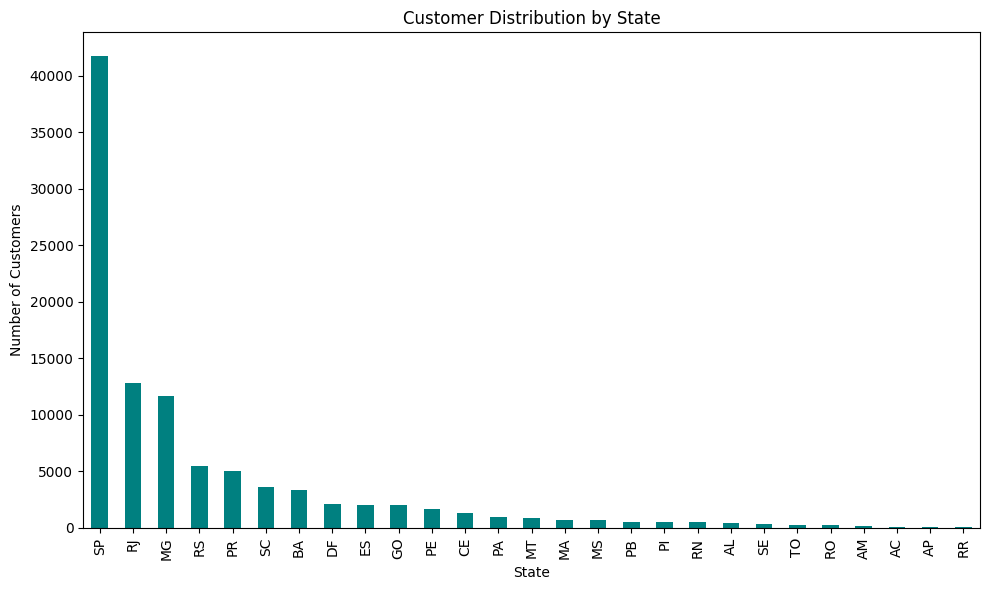

In [12]:
customer_dist = customers["customer_state"].value_counts()

plt.figure(figsize=(10, 6))
customer_dist.plot(kind="bar", color="teal")
plt.title("Customer Distribution by State")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


### 🗺️ Customer Distribution by State

This bar chart shows the number of customers across Brazilian states.

#### 🔍 Observations

- **São Paulo (SP)** dominates with over 40,000 customers — more than triple the count of any other state.
- Other high-density states include:
  - **Rio de Janeiro (RJ)**
  - **Minas Gerais (MG)**
  - **Rio Grande do Sul (RS)**
- The remaining states show progressively lower customer counts, with **AP** and **RR** at the bottom.

#### 🧠 Insights

- The customer base is heavily concentrated in **urban and economically active regions**, especially SP and RJ.
- Marketing, logistics, and seller onboarding efforts should prioritize these high-density states.
- Low-volume states may represent untapped markets or logistical challenges worth investigating.


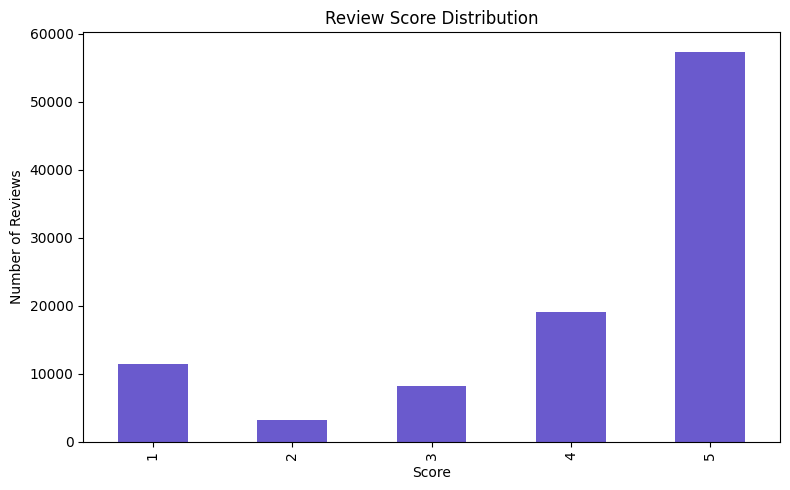

In [13]:
plt.figure(figsize=(8, 5))
reviews["review_score"].value_counts().sort_index().plot(kind="bar", color="slateblue")
plt.title("Review Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


### ⭐ Review Score Distribution

This bar chart displays how customers rated their orders, with scores ranging from 1 to 5.

#### 🔍 Observations

- **Score 5 dominates** with ~60,000 reviews, indicating a strong base of satisfied customers.
- **Score 4** follows with ~20,000 reviews — also positive sentiment.
- **Scores 1 and 3** each have ~10,000 reviews, while **Score 2** is the least common (~5,000).
- The distribution is **skewed toward high ratings**, suggesting overall customer satisfaction.

#### 🧠 Insights

- The platform maintains a **positive customer experience**, with ~80% of reviews scoring 4 or 5.
- Low scores (1–2) are relatively rare but should be investigated for recurring issues (e.g. delivery delays, product mismatch).
- Review scores can be used to segment customer sentiment and correlate with delivery performance or seller reliability.


## 🧠 Step 4: Segmentation & Patterns

With foundational metrics explored, we now segment customers and products to uncover behavioral patterns and strategic opportunities.

### 🎯 Objective

- Segment customers by frequency, recency, and spend
- Identify top-selling product categories
- Analyze delivery performance and its impact on reviews
- Detect high-value customers and sellers

### 🔍 Key Segmentation Dimensions

1. **Customer Frequency**  
   Number of orders per customer

2. **Customer Recency**  
   Time since last purchase

3. **Customer Spend**  
   Total payment value per customer

4. **Top Categories**  
   Most purchased product categories

5. **Delivery Performance**  
   Delay between estimated and actual delivery dates

6. **Review Impact**  
   Correlation between delivery delays and review scores




In [16]:
# Customer Frequency & Spend

# Merge orders with payments
order_payments = orders.merge(payments, on="order_id")

# Frequency: number of orders per customer
customer_freq = orders["customer_id"].value_counts()

# Spend: total payment per customer
customer_spend = order_payments.groupby("customer_id")["payment_value"].sum()

# Combine into one DataFrame
customer_segmentation = pd.DataFrame({
    "order_count": customer_freq,
    "total_spend": customer_spend
}).fillna(0)

customer_segmentation["avg_order_value"] = customer_segmentation["total_spend"] / customer_segmentation["order_count"]

In [17]:
# Delivery Delay & Review Score

# Calculate delivery delay
orders["delivery_delay"] = (orders["order_delivered_customer_date"] - orders["order_estimated_delivery_date"]).dt.days

# Merge with reviews
delivery_reviews = orders.merge(reviews[["order_id", "review_score"]], on="order_id")

# Correlation
correlation = delivery_reviews["delivery_delay"].corr(delivery_reviews["review_score"])
print("Correlation between delivery delay and review score:", round(correlation, 3))


Correlation between delivery delay and review score: -0.267


### 🚚 Delivery Delay vs. Review Score

We calculated the correlation between delivery delay (actual vs. estimated delivery date) and customer review scores.

#### 🔍 Observations

- The correlation coefficient is **-0.267**, indicating a **moderate negative relationship**.
- As delivery delays increase, review scores tend to decrease — customers penalize late deliveries with lower ratings.

#### 🧠 Insights

- Timely delivery is a **critical driver of customer satisfaction**.
- Sellers or logistics partners with frequent delays may be impacting platform reputation.
- This metric can be used to flag operational inefficiencies and prioritize improvements in fulfillment workflows.


## 🧾 Step 5: Business Insights & Executive Report

This section summarizes key findings from the Olist e-commerce dataset analysis.  
It highlights operational strengths, customer behavior, and areas for strategic improvement.

### 🧠 Executive Summary

- **Stable Order Volume, Volatile Revenue**  
  Order counts remained consistent from 2016–2018, but revenue fluctuated sharply.  
  This suggests pricing, product mix, or high-value orders drive financial performance more than volume.

- **Geographic Concentration**  
  Over 40% of customers are located in São Paulo (SP), followed by RJ, MG, and RS.  
  These regions should be prioritized for marketing, logistics, and seller onboarding.

- **High Customer Satisfaction**  
  ~80% of reviews score 4 or 5, indicating strong platform experience.  
  Low scores are rare but correlated with delivery delays.

- **Delivery Delays Impact Reviews**  
  A negative correlation of **-0.267** between delivery delay and review score confirms that late deliveries reduce customer satisfaction.  
  Operational improvements in fulfillment could directly enhance platform reputation.

- **Customer Segmentation**  
  High-value customers can be identified by frequency and spend.  
  Average order value varies significantly, suggesting potential for targeted promotions or loyalty programs.

- **Product Category Gaps**  
  ~600 products lack category metadata — these should be reviewed or excluded from category-level insights.

### 📌 Recommendations

- **Optimize Fulfillment**  
  Reduce delivery delays to improve review scores and retention.

- **Target High-Density Regions**  
  Focus growth efforts on SP, RJ, MG, and RS — where customer volume is highest.

- **Leverage High-Value Customers**  
  Segment and engage frequent buyers with personalized offers.

- **Audit Product Metadata**  
  Clean incomplete product entries to improve category-level reporting and searchability.

- **Monitor Revenue Drivers**  
  Investigate periods of high revenue for replicable pricing or product strategies.

